<a href="https://colab.research.google.com/github/mohannishant6/Fraud-Detection-in-Healthcare/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
pd.set_option('display.max_columns', 500)
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

df=pd.read_csv('provider.csv')

# df=df[df.nppes_provider_state=='NY']

cols=[
# 'npi',
'total_claim_count',
'total_drug_cost',
'bene_count',
'brand_claim_count',
'generic_claim_count',
# 'other_claim_count',
'lis_claim_count',
# 'nonlis_claim_count',
'opioid_claim_count',
'la_opioid_claim_count',
'antibiotic_claim_count',
'antipsych_claim_count_ge65',
'beneficiary_average_risk_score'
]

# df=df[cols]

#take providers having >10 beneficiaries only
df_big_prov=df[df.bene_count.isna()==False]

#fill 7 for fields where <10 not populated due to privacy
X_df=df_big_prov[cols].fillna(7)

X=X_df.values

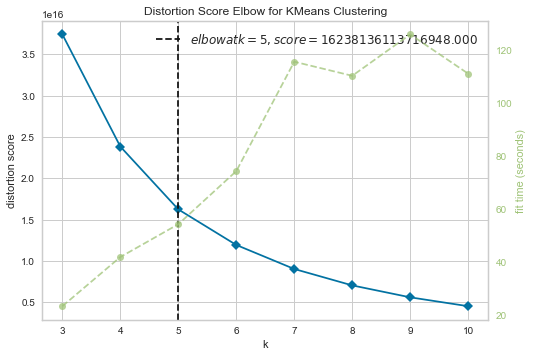

In [0]:
visualizer = KElbowVisualizer(KMeans(init='k-means++'), k=(3,11))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [0]:
kmeans = KMeans(n_clusters=5, init='k-means++').fit(X)
# kmeans.predict(X)
df_c=pd.DataFrame(kmeans.cluster_centers_,columns=cols)


In [0]:
print(df_c)

,total_claim_count,total_drug_cost,bene_count,brand_claim_count,generic_claim_count,other_claim_count,lis_claim_count,opioid_claim_count,beneficiary_average_risk_score
0,8404.828986,1.126756e+06,496.806062,1577.608635,6631.347180,85.297190,4119.533949,380.861286,1.753018
1,505.221858,3.367313e+04,103.432691,63.156300,398.845540,4.127895,201.676466,34.731753,1.507115
2,9104.214713,2.584749e+06,502.838316,2117.507278,6692.240057,115.914609,5827.052898,395.373538,1.929739
3,4789.919942,4.211004e+05,378.289656,783.587940,3897.930056,36.921292,1858.757452,211.464534,1.567156
4,13766.197546,6.356035e+06,650.465031,3793.539877,9523.802454,130.580368,10621.110429,462.177914,1.972812


In [0]:
df_big_prov['cluster']=kmeans.predict(X)

C:\Users\nishant\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_big_prov.to_csv('clusters.csv')